# **Data Preprocessing**

Kami memiliki dataset dengan 14 class wayang, masing-masing class memiliki kurang lebih 100 gambar yang dkumpulkan dari google image. Pada Data Preparation ini, kami ingin membagi data menjadi data untuk training dan data untuk testing.

Data sebelum preprocessing akan tampak sebagai berikut:

-WAYANG
*   Wayang Kresna
*   Wayang Petruk
*   Wayang Bima
*   etc





Data setelah dipreprocessing akan tampak seperti berikut:

*   DATASET
  *   TRAIN
      *   Wayang Kresna
      *   Wayang Petruk
      *   Wayang Bima
      *   etc

  *   TEST
      *   Wayang Kresna
      *   Wayang Petruk
      *   Wayang Bima
      *   etc




# **Import All Denpendencies**

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from google.colab import drive


# **Validate the Data**



In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Unzip the data

In [ ]:
!unzip "/content/drive/MyDrive/Lakon/Dataset/Wayang.zip" -d "/content/drive/MyDrive/Lakon/Dataset"

Archive:  /content/drive/MyDrive/Lakon/Dataset/Wayang.zip
  inflating: /content/drive/MyDrive/Lakon/Dataset/Dataset/Sadewa/Instagram_ceritawayang_45645572_366371760804229_7600923748750341147_n.jpg  
  inflating: /content/drive/MyDrive/Lakon/Dataset/Dataset/Sadewa/images (1).jpg  
  inflating: /content/drive/MyDrive/Lakon/Dataset/Dataset/Sadewa/Wayang-Kulit-arjuna-srikandi-supermini.jpg  
  inflating: /content/drive/MyDrive/Lakon/Dataset/Dataset/Sadewa/SADEWA.png  
  inflating: /content/drive/MyDrive/Lakon/Dataset/Dataset/Sadewa/central-kerajinan_wayang-kulit-standar-dalang-pedalangan-super---sadewa-sadewo_full05.webp  
  inflating: /content/drive/MyDrive/Lakon/Dataset/Dataset/Sadewa/Sadewa-Yogya.jpg  
  inflating: /content/drive/MyDrive/Lakon/Dataset/Dataset/Sadewa/Screenshot 2022-05-22 134656.png  
  inflating: /content/drive/MyDrive/Lakon/Dataset/Dataset/Sadewa/image0011.png  
  inflating: /content/drive/MyDrive/Lakon/Dataset/Dataset/Sadewa/wayang_kulit_nakula_sadewa.png.webp  
  inf

In [ ]:
wayang_types = os.listdir("/content/drive/MyDrive/Lakon/Dataset/Dataset")
print (wayang_types)

['Petruk', 'Semar', 'Arjuna', 'Yudhistira', 'Nakula', 'Kresna', 'Cepot', 'Gatot Kaca', 'Antasena', 'Gareng', 'Hanoman', 'Bima', 'Bagong', 'Abimanyu']


# **Create Destination Directory Structure**

In [ ]:
%cd /content/drive/MyDrive/Lakon/
cwd = os.getcwd()
print (cwd)

/content/drive/MyDrive/Lakon
/content/drive/MyDrive/Lakon


In [ ]:
cwd = os.getcwd()
print (cwd)

if os.path.exists("DATASET"):
    print("Directory is already created!")
else:
    print("Creating DATASET directory ...")
    for types in wayang_types:
        os.makedirs(os.path.join(cwd,"DATASET","TRAIN",types))
        os.makedirs(os.path.join(cwd,"DATASET","TEST",types))
    print("DATASET directory is created!")

/content/drive/MyDrive/Lakon
Creating DATASET directory ...
DATASET directory is created!


Petruk --> 115
Semar --> 110
Arjuna --> 103
Yudhistira --> 105
Nakula --> 101
Kresna --> 100
Cepot --> 100
Gatot Kaca --> 100
Antasena --> 100
Gareng --> 100
Hanoman --> 116
Bima --> 120
Bagong --> 126
Abimanyu --> 100


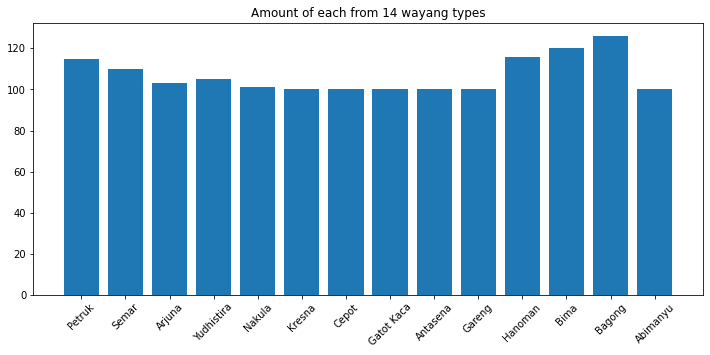

In [ ]:
data_count = []
loc = '/content/drive/MyDrive/Lakon/Dataset/Dataset'
for types in wayang_types:
    count = len(os.listdir(os.path.join(cwd, loc, types)))
    print(f'{types} --> {count}')
    data_count.append(count)

plt.figure(figsize=(12,5))
plt.title(f"Amount of each from {len(wayang_types)} wayang types")
plt.bar(wayang_types, data_count)
plt.xticks(rotation=45)
plt.show()

Splitting the data

In [ ]:
dataset_size = 100
train_size = 80
Wayang = '/content/drive/MyDrive/Lakon/Dataset/Dataset'
for types in wayang_types:
    print(types)
    filenames = os.listdir(os.path.join(Wayang,types))
    filenames = random.sample(filenames, dataset_size)
    for idx, name in enumerate(filenames):
        image = cv2.imread(os.path.join(cwd,Wayang,types,name))
        image = cv2.resize(image,(224,224),interpolation = cv2.INTER_AREA)
        if idx < train_size:
            cv2.imwrite(os.path.join(cwd,"DATASET","TRAIN", types, str(idx)+".jpg"),image)
        else:
            cv2.imwrite(os.path.join(cwd,"DATASET","TEST", types, str(idx)+".jpg"),image)

Petruk
Semar
Arjuna
Yudhistira
Nakula
Kresna
Cepot
Gatot Kaca
Antasena
Gareng
Hanoman
Bima
Bagong
Abimanyu


Terakhir data yang telah dipreprocessing akan diupload ke kaggle untuk kemudian dipakai dalam pembuatan model Machine Learning.